In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Inspect measurement table
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
#Inspect station table
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# View data in measurement table
engine.execute('SELECT * FROM measurement LIMIT 50').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [12]:
# Find last date of measurement
end_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
end_date

'2017-08-23'

In [13]:
# Find measurement that was 12 months ago
twelve_months = dt.date(2017, 8, 23) - dt.timedelta(days=365)
twelve_months

datetime.date(2016, 8, 23)

In [14]:
# Get precipitation data from the last 12 months
twelve_precp = session.query(Measurement.date, func.max(Measurement.prcp)).\
    filter(Measurement.date >= twelve_months).\
    group_by(Measurement.date).all()

twelve_precp

[('2016-08-23', 1.79),
 ('2016-08-24', 2.28),
 ('2016-08-25', 0.21),
 ('2016-08-26', 0.04),
 ('2016-08-27', 0.18),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.74),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.22),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.08),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.

In [15]:
# Put data into Pandas dataframe
precp_df = pd.DataFrame(twelve_precp, columns = ['Date', 'Precipitation'])
precp_df.set_index('Date', inplace=True)
precp_df.sort_values(by='Precipitation', ascending=False)

,Precipitation
Date,
2016-09-14,6.70
2017-04-29,6.25
2017-02-11,5.04
2017-07-22,4.00
2016-10-04,3.46
2016-09-15,3.35
2017-02-12,2.98
2017-02-13,2.90
2016-11-21,2.87


In [16]:
# Describe the dataset
precp_df.describe()

,Precipitation
count,366.000000
mean,0.520765
std,0.830728
min,0.000000
25%,0.040000
50%,0.250000
75%,0.672500
max,6.700000


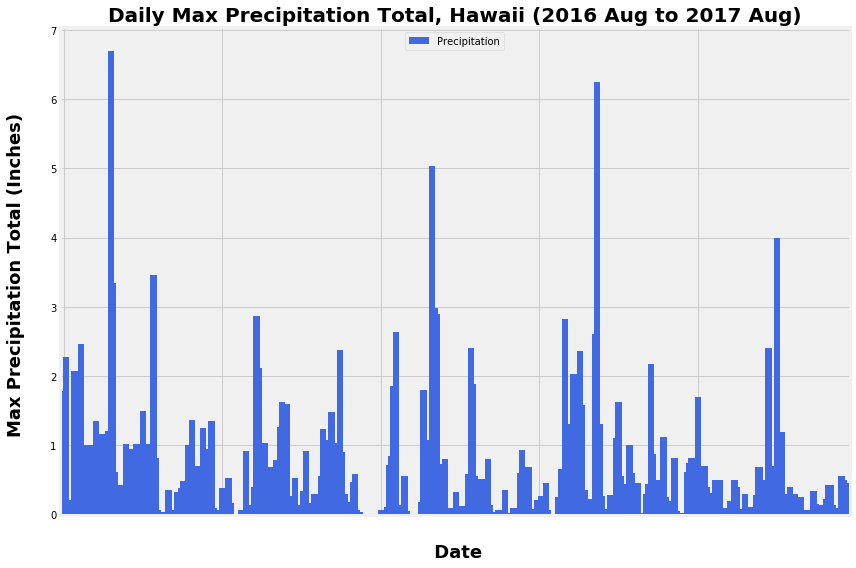

In [29]:
# Plot precipitation data
precipitation = precp_df.plot(kind='bar', width=3, figsize=(12,8), color = 'royalblue')
precipitation.xaxis.set_major_formatter(plt.NullFormatter())

plt.locator_params(axis='x', nbins=5)

plt.title("Daily Max Precipitation Total, Hawaii (2016 Aug to 2017 Aug)", fontsize=20, fontweight='bold')
plt.ylabel("Max Precipitation Total (Inches) \n", fontsize=18, fontweight='bold')
plt.xlabel("\n Date", fontsize=18, fontweight='bold', rotation='horizontal')
plt.tight_layout()

plt.legend(loc = 'upper center')

plt.savefig('Output_Images/Precipitation_Hawaii.png')

plt.show()

In [18]:
# How many weather stations?
stations_total = session.query(Station.id).count()
stations_total

9

In [19]:
# View data from station table
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [20]:
# Get the number of weather measurements grouped by station
station_count = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Min, Max, and Avg temperatures from most active Hawaii station
all_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

print(all_temps)

low_temp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

high_temp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

avg_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()


print(f"The low temperature from the most active station is {low_temp} degrees Fahrenheit.")
print(f"The high temperature from the most active station is {high_temp} degrees Fahrenheit.")
print(f"The avg temperature from the most active station is {avg_temp} degrees Fahrenheit.")

[(54.0, 85.0, 71.66378066378067)]
The low temperature from the most active station is [(54.0,)] degrees Fahrenheit.
The high temperature from the most active station is [(85.0,)] degrees Fahrenheit.
The avg temperature from the most active station is [(71.66378066378067,)] degrees Fahrenheit.


In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.date >= twelve_months).\
    filter(Measurement.station == 'USC00519281').all()

temp

[('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281',

In [23]:
# Put data into Pandas dataframe
station_temp = pd.DataFrame(temp, columns = ['Station Name', 'Temperature'])
station_temp.set_index('Station Name', inplace=True)
station_temp.head()

,Temperature
Station Name,
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0


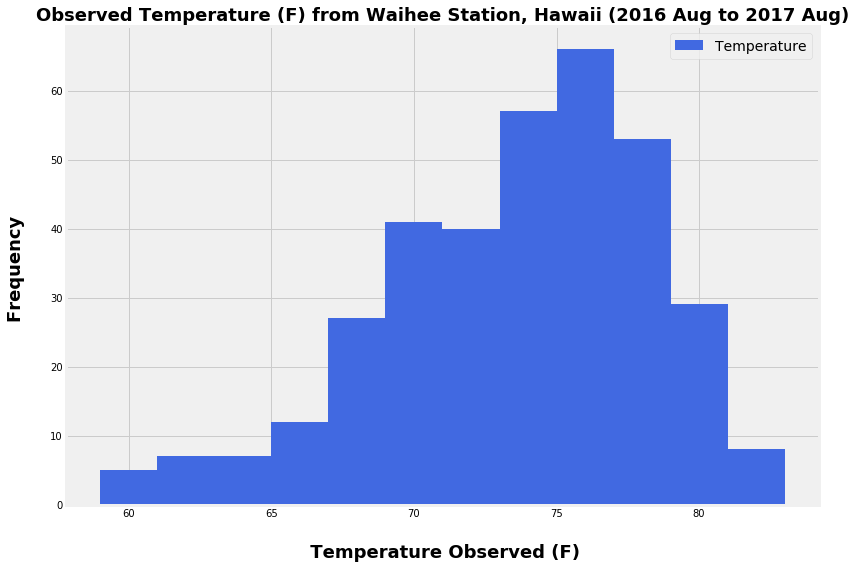

In [30]:
#Plot a histogram of the temperatures from Waihee Station
station_temp.plot.hist(by='Station Name', width=2, figsize=(12,8), color = 'royalblue', bins=12)

plt.title("Observed Temperature (F) from Waihee Station, Hawaii (2016 Aug to 2017 Aug)", fontsize=18, fontweight='bold')
plt.ylabel("Frequency \n", fontsize=18, fontweight='bold')
plt.xlabel("\n Temperature Observed (F)", fontsize=18, fontweight='bold', rotation='horizontal')
plt.tight_layout()

plt.legend(loc = 'upper right', fontsize=14)

plt.savefig('Output_Images/Temperature_Hawaii.png')

plt.show()

In [25]:
# Function to find temperature information from a specific start and end date
def calc_temps(start_date, end_date):   
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [26]:
# My Hawaii trip (May 10, 2017 to May 25, 2017)
def calc_temps(start_date, end_date):   
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

my_trip = calc_temps('2017-05-10', '2017-05-25')

my_trip

[(68.0, 74.92222222222222, 87.0)]